# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

In [58]:
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "Hofn"
# query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
# try:
#     weather_response = requests.get(query_url)
#     weather_json = weather_response.json()
#     #pprint(weather_json)

# except:
#     print('City not found, skipping...')


# pprint(weather_json)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [43]:
city_name = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
temp_date = []


city_weather = pd.DataFrame(columns=['City Name', 'Max Temp', 'Wind Speed'])
url = "http://api.openweathermap.org/data/2.5/weather?"
index_counter = 0
for city in cities:
    print(f'Processing Record {index_counter} of Set X | {city}')
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    try:
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        city_name.append(weather_json['name'])
        latitude.append(weather_json['coord']['lat'])
        longitude.append(weather_json['coord']['lon'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        temp_date.append(weather_json['dt'])

        index_counter = index_counter + 1
       
    except:
        print(f'City [{city}] not found, skipping...')



essing Record 176 of Set X | cockburn town
Processing Record 177 of Set X | sao sebastiao
Processing Record 178 of Set X | miles city
Processing Record 179 of Set X | ust-nera
Processing Record 180 of Set X | bosilegrad
Processing Record 181 of Set X | wollongong
Processing Record 182 of Set X | castro
Processing Record 183 of Set X | tsaratanana
Processing Record 184 of Set X | odweyne
Processing Record 185 of Set X | emerald
Processing Record 186 of Set X | louth
Processing Record 187 of Set X | goderich
Processing Record 188 of Set X | sambava
Processing Record 189 of Set X | felidhoo
City [felidhoo] not found, skipping...
Processing Record 189 of Set X | beloha
Processing Record 190 of Set X | krutinka
Processing Record 191 of Set X | prince rupert
Processing Record 192 of Set X | dudinka
Processing Record 193 of Set X | lalomanu
City [lalomanu] not found, skipping...
Processing Record 193 of Set X | sentyabrskiy
City [sentyabrskiy] not found, skipping...
Processing Record 193 of S

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [1]:
# Convert to DataFrame

weather_dict = {
    'City Name':city_name,
    'Lat':latitude,
    'Lng':longitude,
    'Temp':max_temp,
    'Humidity':humidity,
    'Cloudiness':cloudiness,
    'Wind Speed':wind_speed,
    'Country':country,
    'Date':temp_date
}

weather_df = pd.DataFrame(weather_dict)

# export to csv
weather_df.to_csv(output_data_file)

weather_df.head()

In [39]:
from datetime import datetime
ts = int(utc_date) + int(utc_timezone)
print(datetime.utcfromtimestamp(utc_date).strftime('%Y-%m-%d %H:%M:%S'))

2020-06-27 21:48:13


In [4]:
# data was already processed so load the dataframe from the new csv

weather_df = pd.read_csv(output_data_file)
weather_df

,Unnamed: 0,City Name,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Hofn,64.25,-15.21,54.32,85,100,13.65,IS,1593296014
1,1,Rikitea,-23.12,-134.97,70.54,75,0,17.16,PF,1593295847
2,2,Busselton,-33.65,115.33,60.01,75,100,22.15,AU,1593295847
3,3,Huilong,31.81,121.66,78.01,99,100,1.99,CN,1593296078
4,4,Idrinskoye,54.37,92.14,58.60,86,3,2.53,RU,1593296078
...,...,...,...,...,...,...,...,...,...,...
572,572,Carmagnola,44.85,7.72,69.01,89,36,3.00,IT,1593296152
573,573,Bilibino,68.05,166.44,41.74,62,56,10.49,RU,1593296152
574,574,Alenquer,-1.94,-54.74,84.20,79,20,9.17,BR,1593296152
575,575,Taoudenni,22.68,-3.98,101.71,8,0,10.25,ML,1593296152


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# There are no cities with Humidity > 100%
raining = weather_df.loc[(weather_df['Humidity'] > 100)]
raining

,Unnamed: 0,City Name,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

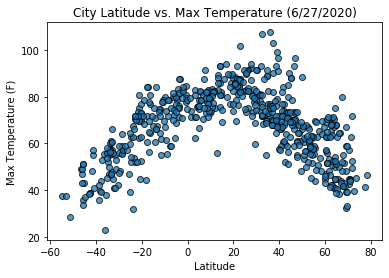

In [38]:
# Latitude v Temperature Plot

plt.scatter(weather_df['Lat'], weather_df['Temp'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Max Temperature (6/27/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("../output_data/latitude_v_temp.png")

## Latitude vs. Humidity Plot

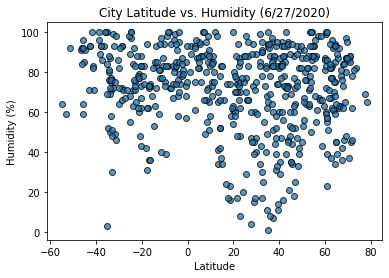

In [39]:
# Latitude v Humidity Plot

plt.scatter(weather_df['Lat'], weather_df['Humidity'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Humidity (6/27/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("../output_data/latitude_v_humidity.png")

## Latitude vs. Cloudiness Plot

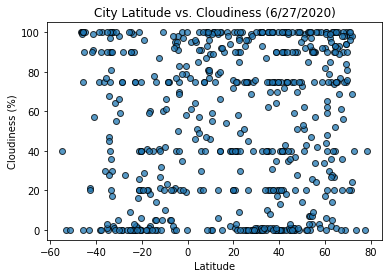

In [40]:
# Latitude v Cloudiness Plot

plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Cloudiness (6/27/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("../output_data/latitude_v_cloudiness.png")

## Latitude vs. Wind Speed Plot

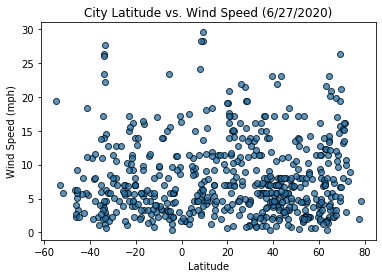

In [41]:
# Latitude v Wind Speed Plot

plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], edgecolors='black', alpha=0.75)
plt.title('City Latitude vs. Wind Speed (6/27/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("../output_data/latitude_v_wind_speed.png")

In [14]:
# Northern vs. Southern 

# Southern
#weather_df.loc[weather_df['Lat'] < 0]

# Northerm
weather_df.loc[weather_df['Lat'] > 0]


,Unnamed: 0,City Name,Lat,Lng,Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Hofn,64.25,-15.21,54.32,85,100,13.65,IS,1593296014
3,3,Huilong,31.81,121.66,78.01,99,100,1.99,CN,1593296078
4,4,Idrinskoye,54.37,92.14,58.60,86,3,2.53,RU,1593296078
5,5,San Jose,37.34,-121.89,90.00,51,20,13.87,US,1593295801
7,7,Jamestown,42.10,-79.24,73.99,78,90,8.05,US,1593296030
...,...,...,...,...,...,...,...,...,...,...
570,570,Waddān,29.16,16.14,79.43,39,0,13.53,LY,1593296152
571,571,Nome,64.50,-165.41,44.60,93,90,23.04,US,1593296152
572,572,Carmagnola,44.85,7.72,69.01,89,36,3.00,IT,1593296152
573,573,Bilibino,68.05,166.44,41.74,62,56,10.49,RU,1593296152


## Linear Regression Plots

### OPTIONAL: Create a function to create Linear Regression plots

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5025254780684767


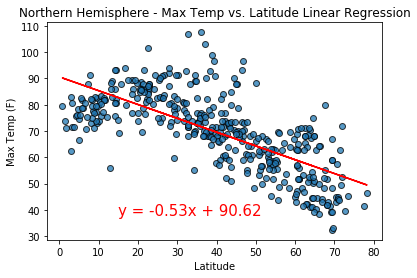

In [43]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
north_weather = weather_df.loc[weather_df['Lat'] > 0]

plt.scatter(north_weather['Lat'], north_weather['Temp'], edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather['Lat'],north_weather['Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (north_weather['Lat'] * slope) + intercept
plt.plot(north_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")

print(f'The r-squared is: {rvalue**2}')

plt.savefig("../output_data/linreg_north_latitude_v_temp.png")

#### Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6626299529013475


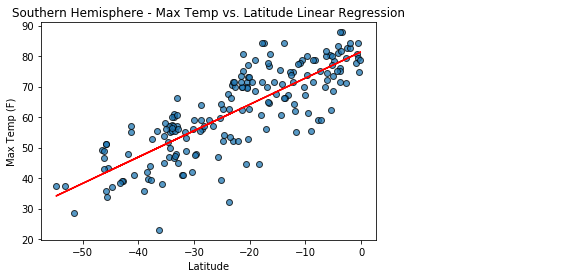

In [44]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
south_weather = weather_df.loc[weather_df['Lat'] < 0]

plt.scatter(south_weather['Lat'], south_weather['Temp'], edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather['Lat'],south_weather['Temp'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (south_weather['Lat'] * slope) + intercept
plt.plot(south_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(15,38),fontsize=15,color="red")

plt.savefig("../output_data/linreg_south_latitude_v_temp.png")

print(f'The r-squared is: {rvalue**2}')


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.00037448496461863385


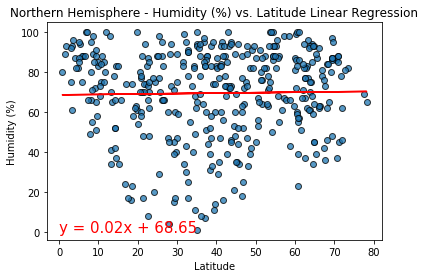

In [45]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

plt.scatter(north_weather['Lat'], north_weather['Humidity'], edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather['Lat'],north_weather['Humidity'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (north_weather['Lat'] * slope) + intercept
plt.plot(north_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(0,0),fontsize=15,color="red")

plt.savefig("../output_data/linreg_north_latitude_v_humidity.png")

print(f'The r-squared is: {rvalue**2}')


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0002900487569349693


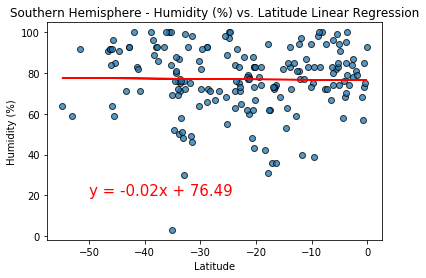

In [46]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

plt.scatter(south_weather['Lat'], south_weather['Humidity'], edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather['Lat'],south_weather['Humidity'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (south_weather['Lat'] * slope) + intercept
plt.plot(south_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.savefig("../output_data/linreg_south_latitude_v_humidity.png")

print(f'The r-squared is: {rvalue**2}')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 1.1189802690569219e-05


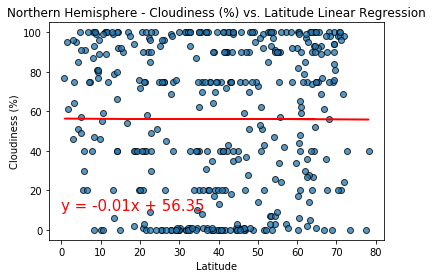

In [47]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.scatter(north_weather['Lat'], north_weather['Cloudiness'], edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather['Lat'],north_weather['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (north_weather['Lat'] * slope) + intercept
plt.plot(north_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(0,10),fontsize=15,color="red")

plt.savefig("../output_data/linreg_north_latitude_v_cloudiness.png")

print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.010044373821248061


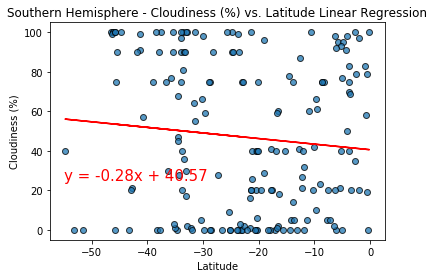

In [48]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.scatter(south_weather['Lat'], south_weather['Cloudiness'], edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather['Lat'],south_weather['Cloudiness'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (south_weather['Lat'] * slope) + intercept
plt.plot(south_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.savefig("../output_data/linreg_south_latitude_v_cloudiness.png")

print(f'The r-squared is: {rvalue**2}')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0015535872434817434


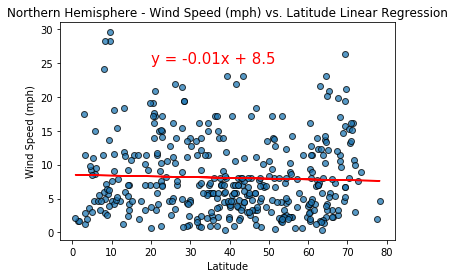

In [49]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.scatter(north_weather['Lat'], north_weather['Wind Speed'], edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_weather['Lat'],north_weather['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (north_weather['Lat'] * slope) + intercept
plt.plot(north_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(20,25),fontsize=15,color="red")

plt.savefig("../output_data/linreg_north_latitude_v_wind_speed.png")

print(f'The r-squared is: {rvalue**2}')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0041374350127798805


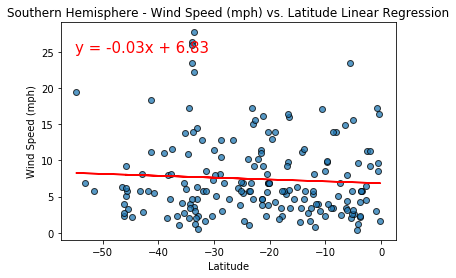

In [50]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.scatter(south_weather['Lat'], south_weather['Wind Speed'], edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

# linear regression plot line
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_weather['Lat'],south_weather['Wind Speed'])
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
reg_values = (south_weather['Lat'] * slope) + intercept
plt.plot(south_weather['Lat'], reg_values, "r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")

plt.savefig("../output_data/linreg_south_latitude_v_wind_speed.png")

print(f'The r-squared is: {rvalue**2}')